# Install missing packages

In [ ]:
!pip install scikit-plot

# Imports

In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt
import seaborn as sb
import time

from sklearn.pipeline      import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics         import accuracy_score, balanced_accuracy_score, confusion_matrix
from sklearn.inspection      import permutation_importance
from sklearn.experimental import enable_hist_gradient_boosting
import scikitplot as skplt

########################################################### CLASSIFIERS

#### MULT
from sklearn.linear_model   import LogisticRegression
from sklearn.linear_model   import RidgeClassifier
from sklearn.svm            import SVC
from sklearn.svm            import NuSVC
from sklearn.svm            import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes    import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble       import StackingClassifier
from sklearn.dummy import DummyClassifier

#### TREE
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier, plot_tree
from lightgbm              import LGBMClassifier
#from catboost              import CatBoostClassifier
#from ngboost               import NGBClassifier
#from rgf.sklearn           import RGFClassifier, FastRGFClassifier

########################################################### REGRESSORS
from sklearn.linear_model  import ElasticNet, Ridge, Lasso, BayesianRidge, ARDRegression, TweedieRegressor
from sklearn.svm           import LinearSVR, NuSVR, SVR
from sklearn.ensemble      import BaggingRegressor
from sklearn.kernel_ridge  import KernelRidge

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sb.set_style("whitegrid")

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


# Read data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project_dir = "/content/drive/MyDrive/TAALES-TAASSC_data/"

In [ ]:
df_lex_simp = pd.read_csv(project_dir + "lexis.csv")
df_lex_comp = pd.read_csv(project_dir + "lexis_comp.csv")
df_syn_simp = pd.read_csv(project_dir + "syntax.csv")
df_syn_comp = pd.read_csv(project_dir + "syntax_comp.csv")

In [ ]:
df_lex_simp.shape, df_lex_comp.shape, df_syn_simp.shape, df_syn_comp.shape

((3800, 486), (3800, 353), (3800, 356), (3800, 10))

My comp data from TAALES had an extra coma at the end of every line. Thus, I had to remove them manually

In [ ]:
df_lex_comp.head()

,Filename,cw_percentage,fw_percentage,KF_Freq_AW,KF_Freq_AW_Log,KF_Ncats_AW,KF_Nsamp_AW,TL_Freq_AW,TL_Freq_AW_Log,Brown_Freq_AW,Brown_Freq_AW_Log,KF_Freq_CW,KF_Freq_CW_Log,KF_Ncats_CW,KF_Nsamp_CW,TL_Freq_CW,TL_Freq_CW_Log,Brown_Freq_CW,Brown_Freq_CW_Log,KF_Freq_FW,KF_Freq_FW_Log,KF_Ncats_FW,KF_Nsamp_FW,TL_Freq_FW,TL_Freq_FW_Log,Brown_Freq_FW,Brown_Freq_FW_Log,MRC_Familiarity_AW,MRC_Concreteness_AW,MRC_Imageability_AW,MRC_Meaningfulness_AW,MRC_Familiarity_CW,MRC_Concreteness_CW,MRC_Imageability_CW,MRC_Familiarity_FW,MRC_Concreteness_FW,MRC_Imageability_FW,MRC_Meaningfulness_FW,Kuperman_AoA_AW,Kuperman_AoA_CW,Kuperman_AoA_FW,SUBTLEXus_Freq_AW,SUBTLEXus_Range_AW,SUBTLEXus_Freq_AW_Log,SUBTLEXus_Range_AW_Log,SUBTLEXus_Freq_CW,SUBTLEXus_Range_CW,SUBTLEXus_Freq_CW_Log,SUBTLEXus_Range_CW_Log,SUBTLEXus_Freq_FW,SUBTLEXus_Range_FW,SUBTLEXus_Freq_FW_Log,SUBTLEXus_Range_FW_Log,BNC_Written_Freq_AW,BNC_Written_Freq_AW_Log,BNC_Written_Range_AW,BNC_Spoken_Freq_AW,BNC_Spoken_Freq_AW_Log,BNC_Spoken_Range_AW,BNC_Written_Freq_CW,BNC_Written_Freq_CW_Log,BNC_Written_Range_CW,BNC_Spoken_Freq_CW,BNC_Spoken_Freq_CW_Log,BNC_Spoken_Range_CW,BNC_Written_Freq_FW,BNC_Written_Freq_FW_Log,BNC_Written_Range_FW,BNC_Spoken_Freq_FW,BNC_Spoken_Freq_FW_Log,BNC_Spoken_Range_FW,BNC_Spoken_Bigram_Normed_Freq,BNC_Spoken_Bigram_Normed_Freq_Log,BNC_Written_Bigram_Freq_Normed,BNC_Written_Bigram_Freq_Normed_Log,BNC_Spoken_Trigram_Normed_Freq,BNC_Spoken_Trigram_Normed_Freq_Log,BNC_Written_Trigram_Freq_Normed,BNC_Written_Trigram_Freq_Normed_Log,COCA_Academic_Range_AW,COCA_Academic_Frequency_AW,COCA_Academic_Range_Log_AW,COCA_Academic_Frequency_Log_AW,COCA_Academic_Range_CW,COCA_Academic_Frequency_CW,COCA_Academic_Range_Log_CW,COCA_Academic_Frequency_Log_CW,COCA_Academic_Range_FW,COCA_Academic_Frequency_FW,COCA_Academic_Range_Log_FW,COCA_Academic_Frequency_Log_FW,COCA_fiction_Range_AW,COCA_fiction_Frequency_AW,COCA_fiction_Range_Log_AW,COCA_fiction_Frequency_Log_AW,COCA_fiction_Range_CW,COCA_fiction_Frequency_CW,COCA_fiction_Range_Log_CW,COCA_fiction_Frequency_Log_CW,COCA_fiction_Range_FW,COCA_fiction_Frequency_FW,COCA_fiction_Range_Log_FW,COCA_fiction_Frequency_Log_FW,COCA_magazine_Range_AW,COCA_magazine_Frequency_AW,COCA_magazine_Range_Log_AW,COCA_magazine_Frequency_Log_AW,COCA_magazine_Range_CW,COCA_magazine_Frequency_CW,COCA_magazine_Range_Log_CW,COCA_magazine_Frequency_Log_CW,COCA_magazine_Range_FW,COCA_magazine_Frequency_FW,COCA_magazine_Range_Log_FW,COCA_magazine_Frequency_Log_FW,COCA_news_Range_AW,COCA_news_Frequency_AW,COCA_news_Range_Log_AW,COCA_news_Frequency_Log_AW,COCA_news_Range_CW,COCA_news_Frequency_CW,COCA_news_Range_Log_CW,COCA_news_Frequency_Log_CW,COCA_news_Range_FW,COCA_news_Frequency_FW,COCA_news_Range_Log_FW,COCA_news_Frequency_Log_FW,COCA_spoken_Range_AW,COCA_spoken_Frequency_AW,COCA_spoken_Range_Log_AW,COCA_spoken_Frequency_Log_AW,COCA_spoken_Range_CW,COCA_spoken_Frequency_CW,COCA_spoken_Range_Log_CW,COCA_spoken_Frequency_Log_CW,COCA_spoken_Range_FW,COCA_spoken_Frequency_FW,COCA_spoken_Range_Log_FW,COCA_spoken_Frequency_Log_FW,COCA_Academic_Bigram_Frequency,COCA_Academic_Bigram_Range,COCA_Academic_Bigram_Frequency_Log,COCA_Academic_Bigram_Range_Log,COCA_academic_bi_MI,COCA_academic_bi_MI2,COCA_academic_bi_T,COCA_academic_bi_DP,COCA_academic_bi_AC,COCA_Fiction_Bigram_Frequency,COCA_Fiction_Bigram_Range,COCA_Fiction_Bigram_Frequency_Log,COCA_Fiction_Bigram_Range_Log,COCA_fiction_bi_MI,COCA_fiction_bi_MI2,COCA_fiction_bi_T,COCA_fiction_bi_DP,COCA_fiction_bi_AC,COCA_Magazine_Bigram_Frequency,COCA_Magazine_Bigram_Range,COCA_Magazine_Bigram_Frequency_Log,COCA_Magazine_Bigram_Range_Log,COCA_magazine_bi_MI,COCA_magazine_bi_MI2,COCA_magazine_bi_T,COCA_magazine_bi_DP,COCA_magazine_bi_AC,COCA_News_Bigram_Frequency,COCA_News_Bigram_Range,COCA_News_Bigram_Frequency_Log,COCA_News_Bigram_Range_Log,COCA_news_bi_MI,COCA_news_bi_MI2,COCA_news_bi_T,COCA_news_bi_DP,COCA_news_bi_AC,COCA_spoken_Bigram_Frequency,COCA_spoken_Bigram_Range,COCA_spoken_Bigram_Frequency_Log,COCA

I rename the column "Filename" to "filename" in these 2 dfs

In [ ]:
# Rename 'Filename' to 'filename' in df_lex_simp
df_lex_simp.rename(columns={'Filename': 'filename'}, inplace=True)

# Rename 'Filename' to 'filename' in df_lex_comp
df_lex_comp.rename(columns={'Filename': 'filename'}, inplace=True)


In [ ]:
# Convert 'filename' column to string type
df_lex_comp['filename'] = df_lex_comp['filename'].astype(str)
df_lex_simp['filename'] = df_lex_simp['filename'].astype(str)
df_syn_comp['filename'] = df_syn_comp['filename'].astype(str)
df_syn_simp['filename'] = df_syn_simp['filename'].astype(str)

Here, I extract the CEFR level tag from the filename column of each df

In [ ]:
df_lex_simp['CEFR'] = df_lex_simp['filename'].str.extract('(A2|B1_1|B1_2|B2)')
df_lex_comp['CEFR'] = df_lex_comp['filename'].str.extract('(A2|B1_1|B1_2|B2)')
df_syn_simp['CEFR'] = df_syn_simp['filename'].str.extract('(A2|B1_1|B1_2|B2)')
df_syn_comp['CEFR'] = df_syn_comp['filename'].str.extract('(A2|B1_1|B1_2|B2)')

In [ ]:
df_lex_comp.head()

,filename,cw_percentage,fw_percentage,KF_Freq_AW,KF_Freq_AW_Log,KF_Ncats_AW,KF_Nsamp_AW,TL_Freq_AW,TL_Freq_AW_Log,Brown_Freq_AW,Brown_Freq_AW_Log,KF_Freq_CW,KF_Freq_CW_Log,KF_Ncats_CW,KF_Nsamp_CW,TL_Freq_CW,TL_Freq_CW_Log,Brown_Freq_CW,Brown_Freq_CW_Log,KF_Freq_FW,KF_Freq_FW_Log,KF_Ncats_FW,KF_Nsamp_FW,TL_Freq_FW,TL_Freq_FW_Log,Brown_Freq_FW,Brown_Freq_FW_Log,MRC_Familiarity_AW,MRC_Concreteness_AW,MRC_Imageability_AW,MRC_Meaningfulness_AW,MRC_Familiarity_CW,MRC_Concreteness_CW,MRC_Imageability_CW,MRC_Familiarity_FW,MRC_Concreteness_FW,MRC_Imageability_FW,MRC_Meaningfulness_FW,Kuperman_AoA_AW,Kuperman_AoA_CW,Kuperman_AoA_FW,SUBTLEXus_Freq_AW,SUBTLEXus_Range_AW,SUBTLEXus_Freq_AW_Log,SUBTLEXus_Range_AW_Log,SUBTLEXus_Freq_CW,SUBTLEXus_Range_CW,SUBTLEXus_Freq_CW_Log,SUBTLEXus_Range_CW_Log,SUBTLEXus_Freq_FW,SUBTLEXus_Range_FW,SUBTLEXus_Freq_FW_Log,SUBTLEXus_Range_FW_Log,BNC_Written_Freq_AW,BNC_Written_Freq_AW_Log,BNC_Written_Range_AW,BNC_Spoken_Freq_AW,BNC_Spoken_Freq_AW_Log,BNC_Spoken_Range_AW,BNC_Written_Freq_CW,BNC_Written_Freq_CW_Log,BNC_Written_Range_CW,BNC_Spoken_Freq_CW,BNC_Spoken_Freq_CW_Log,BNC_Spoken_Range_CW,BNC_Written_Freq_FW,BNC_Written_Freq_FW_Log,BNC_Written_Range_FW,BNC_Spoken_Freq_FW,BNC_Spoken_Freq_FW_Log,BNC_Spoken_Range_FW,BNC_Spoken_Bigram_Normed_Freq,BNC_Spoken_Bigram_Normed_Freq_Log,BNC_Written_Bigram_Freq_Normed,BNC_Written_Bigram_Freq_Normed_Log,BNC_Spoken_Trigram_Normed_Freq,BNC_Spoken_Trigram_Normed_Freq_Log,BNC_Written_Trigram_Freq_Normed,BNC_Written_Trigram_Freq_Normed_Log,COCA_Academic_Range_AW,COCA_Academic_Frequency_AW,COCA_Academic_Range_Log_AW,COCA_Academic_Frequency_Log_AW,COCA_Academic_Range_CW,COCA_Academic_Frequency_CW,COCA_Academic_Range_Log_CW,COCA_Academic_Frequency_Log_CW,COCA_Academic_Range_FW,COCA_Academic_Frequency_FW,COCA_Academic_Range_Log_FW,COCA_Academic_Frequency_Log_FW,COCA_fiction_Range_AW,COCA_fiction_Frequency_AW,COCA_fiction_Range_Log_AW,COCA_fiction_Frequency_Log_AW,COCA_fiction_Range_CW,COCA_fiction_Frequency_CW,COCA_fiction_Range_Log_CW,COCA_fiction_Frequency_Log_CW,COCA_fiction_Range_FW,COCA_fiction_Frequency_FW,COCA_fiction_Range_Log_FW,COCA_fiction_Frequency_Log_FW,COCA_magazine_Range_AW,COCA_magazine_Frequency_AW,COCA_magazine_Range_Log_AW,COCA_magazine_Frequency_Log_AW,COCA_magazine_Range_CW,COCA_magazine_Frequency_CW,COCA_magazine_Range_Log_CW,COCA_magazine_Frequency_Log_CW,COCA_magazine_Range_FW,COCA_magazine_Frequency_FW,COCA_magazine_Range_Log_FW,COCA_magazine_Frequency_Log_FW,COCA_news_Range_AW,COCA_news_Frequency_AW,COCA_news_Range_Log_AW,COCA_news_Frequency_Log_AW,COCA_news_Range_CW,COCA_news_Frequency_CW,COCA_news_Range_Log_CW,COCA_news_Frequency_Log_CW,COCA_news_Range_FW,COCA_news_Frequency_FW,COCA_news_Range_Log_FW,COCA_news_Frequency_Log_FW,COCA_spoken_Range_AW,COCA_spoken_Frequency_AW,COCA_spoken_Range_Log_AW,COCA_spoken_Frequency_Log_AW,COCA_spoken_Range_CW,COCA_spoken_Frequency_CW,COCA_spoken_Range_Log_CW,COCA_spoken_Frequency_Log_CW,COCA_spoken_Range_FW,COCA_spoken_Frequency_FW,COCA_spoken_Range_Log_FW,COCA_spoken_Frequency_Log_FW,COCA_Academic_Bigram_Frequency,COCA_Academic_Bigram_Range,COCA_Academic_Bigram_Frequency_Log,COCA_Academic_Bigram_Range_Log,COCA_academic_bi_MI,COCA_academic_bi_MI2,COCA_academic_bi_T,COCA_academic_bi_DP,COCA_academic_bi_AC,COCA_Fiction_Bigram_Frequency,COCA_Fiction_Bigram_Range,COCA_Fiction_Bigram_Frequency_Log,COCA_Fiction_Bigram_Range_Log,COCA_fiction_bi_MI,COCA_fiction_bi_MI2,COCA_fiction_bi_T,COCA_fiction_bi_DP,COCA_fiction_bi_AC,COCA_Magazine_Bigram_Frequency,COCA_Magazine_Bigram_Range,COCA_Magazine_Bigram_Frequency_Log,COCA_Magazine_Bigram_Range_Log,COCA_magazine_bi_MI,COCA_magazine_bi_MI2,COCA_magazine_bi_T,COCA_magazine_bi_DP,COCA_magazine_bi_AC,COCA_News_Bigram_Frequency,COCA_News_Bigram_Range,COCA_News_Bigram_Frequency_Log,COCA_News_Bigram_Range_Log,COCA_news_bi_MI,COCA_news_bi_MI2,COCA_news_bi_T,COCA_news_bi_DP,COCA_news_bi_AC,COCA_spoken_Bigram_Frequency,COCA_spoken_Bigram_Range,COCA_spoken_Bigram_Frequency_Log,COCA

In [ ]:
df_lex_simp.shape, df_lex_comp.shape, df_syn_simp.shape, df_syn_comp.shape

((3800, 487), (3800, 354), (3800, 357), (3800, 11))

In [ ]:
df_lex_simp.CEFR.value_counts()

CEFR
B1_2    1876
B1_1     884
B2       640
A2       400
Name: count, dtype: int64

I had to merge instead of concatenating due to the duplication of some characteristics

In [ ]:
y = df_lex_simp["CEFR"]

# Drop the unnecessary columns
x_lex_simp = df_lex_simp.drop(columns=["filename", "Word Count", "CEFR"])
x_lex_comp = df_lex_comp.drop(columns=["filename", "CEFR"])

x_lex_simp_comp = pd.concat([x_lex_simp, x_lex_comp], axis=1)

x_syn_simp = df_syn_simp.drop(columns=["filename", "nwords", "CEFR"])
x_syn_comp = df_syn_comp.drop(columns=["filename", "CEFR"])

x_syn_simp_comp = pd.concat([x_syn_simp, x_syn_comp], axis=1)


In [ ]:
df_lex_comp.head()

,filename,cw_percentage,fw_percentage,KF_Freq_AW,KF_Freq_AW_Log,KF_Ncats_AW,KF_Nsamp_AW,TL_Freq_AW,TL_Freq_AW_Log,Brown_Freq_AW,Brown_Freq_AW_Log,KF_Freq_CW,KF_Freq_CW_Log,KF_Ncats_CW,KF_Nsamp_CW,TL_Freq_CW,TL_Freq_CW_Log,Brown_Freq_CW,Brown_Freq_CW_Log,KF_Freq_FW,KF_Freq_FW_Log,KF_Ncats_FW,KF_Nsamp_FW,TL_Freq_FW,TL_Freq_FW_Log,Brown_Freq_FW,Brown_Freq_FW_Log,MRC_Familiarity_AW,MRC_Concreteness_AW,MRC_Imageability_AW,MRC_Meaningfulness_AW,MRC_Familiarity_CW,MRC_Concreteness_CW,MRC_Imageability_CW,MRC_Familiarity_FW,MRC_Concreteness_FW,MRC_Imageability_FW,MRC_Meaningfulness_FW,Kuperman_AoA_AW,Kuperman_AoA_CW,Kuperman_AoA_FW,SUBTLEXus_Freq_AW,SUBTLEXus_Range_AW,SUBTLEXus_Freq_AW_Log,SUBTLEXus_Range_AW_Log,SUBTLEXus_Freq_CW,SUBTLEXus_Range_CW,SUBTLEXus_Freq_CW_Log,SUBTLEXus_Range_CW_Log,SUBTLEXus_Freq_FW,SUBTLEXus_Range_FW,SUBTLEXus_Freq_FW_Log,SUBTLEXus_Range_FW_Log,BNC_Written_Freq_AW,BNC_Written_Freq_AW_Log,BNC_Written_Range_AW,BNC_Spoken_Freq_AW,BNC_Spoken_Freq_AW_Log,BNC_Spoken_Range_AW,BNC_Written_Freq_CW,BNC_Written_Freq_CW_Log,BNC_Written_Range_CW,BNC_Spoken_Freq_CW,BNC_Spoken_Freq_CW_Log,BNC_Spoken_Range_CW,BNC_Written_Freq_FW,BNC_Written_Freq_FW_Log,BNC_Written_Range_FW,BNC_Spoken_Freq_FW,BNC_Spoken_Freq_FW_Log,BNC_Spoken_Range_FW,BNC_Spoken_Bigram_Normed_Freq,BNC_Spoken_Bigram_Normed_Freq_Log,BNC_Written_Bigram_Freq_Normed,BNC_Written_Bigram_Freq_Normed_Log,BNC_Spoken_Trigram_Normed_Freq,BNC_Spoken_Trigram_Normed_Freq_Log,BNC_Written_Trigram_Freq_Normed,BNC_Written_Trigram_Freq_Normed_Log,COCA_Academic_Range_AW,COCA_Academic_Frequency_AW,COCA_Academic_Range_Log_AW,COCA_Academic_Frequency_Log_AW,COCA_Academic_Range_CW,COCA_Academic_Frequency_CW,COCA_Academic_Range_Log_CW,COCA_Academic_Frequency_Log_CW,COCA_Academic_Range_FW,COCA_Academic_Frequency_FW,COCA_Academic_Range_Log_FW,COCA_Academic_Frequency_Log_FW,COCA_fiction_Range_AW,COCA_fiction_Frequency_AW,COCA_fiction_Range_Log_AW,COCA_fiction_Frequency_Log_AW,COCA_fiction_Range_CW,COCA_fiction_Frequency_CW,COCA_fiction_Range_Log_CW,COCA_fiction_Frequency_Log_CW,COCA_fiction_Range_FW,COCA_fiction_Frequency_FW,COCA_fiction_Range_Log_FW,COCA_fiction_Frequency_Log_FW,COCA_magazine_Range_AW,COCA_magazine_Frequency_AW,COCA_magazine_Range_Log_AW,COCA_magazine_Frequency_Log_AW,COCA_magazine_Range_CW,COCA_magazine_Frequency_CW,COCA_magazine_Range_Log_CW,COCA_magazine_Frequency_Log_CW,COCA_magazine_Range_FW,COCA_magazine_Frequency_FW,COCA_magazine_Range_Log_FW,COCA_magazine_Frequency_Log_FW,COCA_news_Range_AW,COCA_news_Frequency_AW,COCA_news_Range_Log_AW,COCA_news_Frequency_Log_AW,COCA_news_Range_CW,COCA_news_Frequency_CW,COCA_news_Range_Log_CW,COCA_news_Frequency_Log_CW,COCA_news_Range_FW,COCA_news_Frequency_FW,COCA_news_Range_Log_FW,COCA_news_Frequency_Log_FW,COCA_spoken_Range_AW,COCA_spoken_Frequency_AW,COCA_spoken_Range_Log_AW,COCA_spoken_Frequency_Log_AW,COCA_spoken_Range_CW,COCA_spoken_Frequency_CW,COCA_spoken_Range_Log_CW,COCA_spoken_Frequency_Log_CW,COCA_spoken_Range_FW,COCA_spoken_Frequency_FW,COCA_spoken_Range_Log_FW,COCA_spoken_Frequency_Log_FW,COCA_Academic_Bigram_Frequency,COCA_Academic_Bigram_Range,COCA_Academic_Bigram_Frequency_Log,COCA_Academic_Bigram_Range_Log,COCA_academic_bi_MI,COCA_academic_bi_MI2,COCA_academic_bi_T,COCA_academic_bi_DP,COCA_academic_bi_AC,COCA_Fiction_Bigram_Frequency,COCA_Fiction_Bigram_Range,COCA_Fiction_Bigram_Frequency_Log,COCA_Fiction_Bigram_Range_Log,COCA_fiction_bi_MI,COCA_fiction_bi_MI2,COCA_fiction_bi_T,COCA_fiction_bi_DP,COCA_fiction_bi_AC,COCA_Magazine_Bigram_Frequency,COCA_Magazine_Bigram_Range,COCA_Magazine_Bigram_Frequency_Log,COCA_Magazine_Bigram_Range_Log,COCA_magazine_bi_MI,COCA_magazine_bi_MI2,COCA_magazine_bi_T,COCA_magazine_bi_DP,COCA_magazine_bi_AC,COCA_News_Bigram_Frequency,COCA_News_Bigram_Range,COCA_News_Bigram_Frequency_Log,COCA_News_Bigram_Range_Log,COCA_news_bi_MI,COCA_news_bi_MI2,COCA_news_bi_T,COCA_news_bi_DP,COCA_news_bi_AC,COCA_spoken_Bigram_Frequency,COCA_spoken_Bigram_Range,COCA_spoken_Bigram_Frequency_Log,COCA

In [ ]:
x_lex_simp_comp.shape

(3800, 836)

# <center> DATOS LÉXICOS (148 feats, 2365 rows)

In [ ]:
#df_lex_simp.columns.values
x_lex_simp_comp.head()

,KF_Freq_AW,KF_Freq_AW_Log,KF_Ncats_AW,KF_Nsamp_AW,TL_Freq_AW,TL_Freq_AW_Log,Brown_Freq_AW,Brown_Freq_AW_Log,KF_Freq_CW,KF_Freq_CW_Log,KF_Ncats_CW,KF_Nsamp_CW,TL_Freq_CW,TL_Freq_CW_Log,Brown_Freq_CW,Brown_Freq_CW_Log,KF_Freq_FW,KF_Freq_FW_Log,KF_Ncats_FW,KF_Nsamp_FW,TL_Freq_FW,TL_Freq_FW_Log,Brown_Freq_FW,Brown_Freq_FW_Log,MRC_Familiarity_AW,MRC_Concreteness_AW,MRC_Imageability_AW,MRC_Meaningfulness_AW,MRC_Familiarity_CW,MRC_Concreteness_CW,MRC_Imageability_CW,MRC_Familiarity_FW,MRC_Concreteness_FW,MRC_Imageability_FW,MRC_Meaningfulness_FW,Kuperman_AoA_AW,Kuperman_AoA_CW,Kuperman_AoA_FW,Brysbaert_Concreteness_Combined_AW,Brysbaert_Concreteness_Combined_CW,Brysbaert_Concreteness_Combined_FW,SUBTLEXus_Freq_AW,SUBTLEXus_Range_AW,SUBTLEXus_Freq_AW_Log,SUBTLEXus_Range_AW_Log,SUBTLEXus_Freq_CW,SUBTLEXus_Range_CW,SUBTLEXus_Freq_CW_Log,SUBTLEXus_Range_CW_Log,SUBTLEXus_Freq_FW,SUBTLEXus_Range_FW,SUBTLEXus_Freq_FW_Log,SUBTLEXus_Range_FW_Log,BNC_Written_Freq_AW,BNC_Written_Freq_AW_Log,BNC_Written_Range_AW,BNC_Spoken_Freq_AW,BNC_Spoken_Freq_AW_Log,BNC_Spoken_Range_AW,BNC_Written_Freq_CW,BNC_Written_Freq_CW_Log,BNC_Written_Range_CW,BNC_Spoken_Freq_CW,BNC_Spoken_Freq_CW_Log,BNC_Spoken_Range_CW,BNC_Written_Freq_FW,BNC_Written_Freq_FW_Log,BNC_Written_Range_FW,BNC_Spoken_Freq_FW,BNC_Spoken_Freq_FW_Log,BNC_Spoken_Range_FW,BNC_Spoken_Bigram_Normed_Freq,BNC_Spoken_Bigram_Normed_Freq_Log,BNC_Written_Bigram_Freq_Normed,BNC_Written_Bigram_Freq_Normed_Log,BNC_Spoken_Trigram_Normed_Freq,BNC_Spoken_Trigram_Normed_Freq_Log,BNC_Written_Trigram_Freq_Normed,BNC_Written_Trigram_Freq_Normed_Log,BNC_Spoken_Bigram_Proportion,BNC_Written_Bigram_Proportion,BNC_Spoken_Trigram_Proportion,BNC_Written_Trigram_Proportion,COCA_Academic_Range_AW,COCA_Academic_Frequency_AW,COCA_Academic_Range_Log_AW,COCA_Academic_Frequency_Log_AW,COCA_Academic_Range_CW,COCA_Academic_Frequency_CW,COCA_Academic_Range_Log_CW,COCA_Academic_Frequency_Log_CW,COCA_Academic_Range_FW,COCA_Academic_Frequency_FW,COCA_Academic_Range_Log_FW,COCA_Academic_Frequency_Log_FW,COCA_fiction_Range_AW,COCA_fiction_Frequency_AW,COCA_fiction_Range_Log_AW,COCA_fiction_Frequency_Log_AW,COCA_fiction_Range_CW,COCA_fiction_Frequency_CW,COCA_fiction_Range_Log_CW,COCA_fiction_Frequency_Log_CW,COCA_fiction_Range_FW,COCA_fiction_Frequency_FW,COCA_fiction_Range_Log_FW,COCA_fiction_Frequency_Log_FW,COCA_magazine_Range_AW,COCA_magazine_Frequency_AW,COCA_magazine_Range_Log_AW,COCA_magazine_Frequency_Log_AW,COCA_magazine_Range_CW,COCA_magazine_Frequency_CW,COCA_magazine_Range_Log_CW,COCA_magazine_Frequency_Log_CW,COCA_magazine_Range_FW,COCA_magazine_Frequency_FW,COCA_magazine_Range_Log_FW,COCA_magazine_Frequency_Log_FW,COCA_news_Range_AW,COCA_news_Frequency_AW,COCA_news_Range_Log_AW,COCA_news_Frequency_Log_AW,COCA_news_Range_CW,COCA_news_Frequency_CW,COCA_news_Range_Log_CW,COCA_news_Frequency_Log_CW,COCA_news_Range_FW,COCA_news_Frequency_FW,COCA_news_Range_Log_FW,COCA_news_Frequency_Log_FW,COCA_spoken_Range_AW,COCA_spoken_Frequency_AW,COCA_spoken_Range_Log_AW,COCA_spoken_Frequency_Log_AW,COCA_spoken_Range_CW,COCA_spoken_Frequency_CW,COCA_spoken_Range_Log_CW,COCA_spoken_Frequency_Log_CW,COCA_spoken_Range_FW,COCA_spoken_Frequency_FW,COCA_spoken_Range_Log_FW,COCA_spoken_Frequency_Log_FW,COCA_Academic_Bigram_Frequency,COCA_Academic_Bigram_Range,COCA_Academic_Bigram_Frequency_Log,COCA_Academic_Bigram_Range_Log,COCA_academic_bi_MI,COCA_academic_bi_MI2,COCA_academic_bi_T,COCA_academic_bi_DP,COCA_academic_bi_AC,COCA_academic_bi_prop_10k,COCA_academic_bi_prop_20k,COCA_academic_bi_prop_30k,COCA_academic_bi_prop_40k,COCA_academic_bi_prop_50k,COCA_academic_bi_prop_60k,COCA_academic_bi_prop_70k,COCA_academic_bi_prop_80k,COCA_academic_bi_prop_90k,COCA_academic_bi_prop_100k,COCA_Fiction_Bigram_Frequency,COCA_Fiction_Bigram_Range,COCA_Fiction_Bigram_Frequency_Log,COCA_Fiction_Bigram_Range_Log,COCA_fiction_bi_MI,COCA_fiction_bi_MI2,COCA_fiction_bi_T,COCA_fiction_bi_DP,COCA_fiction_bi_AC,COCA_fiction_bi_prop_10k,COCA_fiction_bi_prop_20k,COCA

In [ ]:
mult_classifiers = {
  #"Stacking":           StackingClassifier(estimators=ensemble2, final_estimator=LogisticRegression()),
  "LogRegr l1 liblin":  LogisticRegression(penalty='l1', solver='liblinear', tol=1e-6, max_iter=int(1e6), warm_start=True, intercept_scaling=10000.),
  "LogRegr l2 lbfgs":   LogisticRegression(penalty='l2', solver='lbfgs', n_jobs=-1),
  "LogRegr l1 saga":    LogisticRegression(penalty='l1', solver='saga', tol=0.01, n_jobs=-1),
  "LogRegr l2 saga":    LogisticRegression(penalty='l2', solver='saga', tol=0.01, n_jobs=-1),
  "LogRegr elasticnet": LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, tol=0.01, n_jobs=-1),
  "Ridge 1.":           RidgeClassifier(alpha=1.),
  "Ridge .5":           RidgeClassifier(alpha=.5),
  "Ridge .1":           RidgeClassifier(alpha=.1),
  "Ridge .01":          RidgeClassifier(alpha=.01),
  "Ridge .001":         RidgeClassifier(alpha=.001),
  "Ridge .0001":        RidgeClassifier(alpha=.0001),
  "Ridge .00001":       RidgeClassifier(alpha=.00001),
  "SVM_lin":            SVC(kernel="linear", C=0.025),
  "SVM_rbf":            SVC(kernel='rbf'),
  "NuSVC_rbf":          NuSVC(nu = 0.01),
  "NuSVC_lin":          NuSVC(nu = 0.01, kernel="linear"),
  "LinearSVC":          LinearSVC(),
  "KNN3":               KNeighborsClassifier(3),
  "KNN5":               KNeighborsClassifier(5),
# "GP":                 GaussianProcessClassifier(1.0 * RBF(1.0)),
  "GaussianNB":         GaussianNB()
}

mult_classifiers = {name: make_pipeline(StandardScaler(), model) for name, model in mult_classifiers.items()}

tree_classifiers = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees":   ExtraTreesClassifier(n_estimators=100, n_jobs=-1),
  "Random Forest": RandomForestClassifier(n_estimators=100, n_jobs=-1),
# "AdaBoost":      AdaBoostClassifier(n_estimators=100),
# "Skl GBM":       GradientBoostingClassifier(n_estimators=100),
# "Skl HistGBM":   HistGradientBoostingClassifier(),
  "XGBoost":       XGBClassifier(n_estimators=100, n_jobs=-1),
  "LightGBM":      LGBMClassifier(n_estimators=100, n_jobs=-1),
# "CatBoost":      CatBoostClassifier(n_estimators=100),
# "NGBoost":       NGBClassifier(n_estimators=100),
# "RGF":           RGFClassifier(n_jobs=-1),
# "FastRGF":       FastRGFClassifier())
}
dummy_classifier = {
    "Dummy_classifier": DummyClassifier()
}

In [ ]:
models = {**mult_classifiers, **tree_classifiers, **dummy_classifier}

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(f'Length of y: {len(y)}')
print(f'Number of samples in x_lex_simp_comp: {x_lex_simp_comp.shape[0]}')

# Ensure they are the same
assert len(y) == x_lex_simp_comp.shape[0], "The number of samples in X and y must be the same"


Length of y: 3800
Number of samples in x_lex_simp_comp: 3800


In [ ]:
duplicate_columns = x_lex_simp_comp.columns[x_lex_simp_comp.columns.duplicated()]
duplicate_columns

Index(['KF_Freq_AW', 'KF_Freq_AW_Log', 'KF_Ncats_AW', 'KF_Nsamp_AW',
       'TL_Freq_AW', 'TL_Freq_AW_Log', 'Brown_Freq_AW', 'Brown_Freq_AW_Log',
       'KF_Freq_CW', 'KF_Freq_CW_Log',
       ...
       'poly_noun', 'poly_verb', 'poly_adj', 'poly_adv', 'hyper_noun_S1_P1',
       'hyper_noun_Sav_P1', 'hyper_noun_Sav_Pav', 'hyper_verb_S1_P1',
       'hyper_verb_Sav_P1', 'hyper_verb_Sav_Pav'],
      dtype='object', length=350)

In [ ]:
x_lex_simp_comp = x_lex_simp_comp.loc[:,~x_lex_simp_comp.columns.duplicated()].copy()

In [ ]:
from IPython.display import clear_output

preds = {}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

for name, model in models.items():
    #cv_r = cross_val_score(model, x, y, cv=skf, scoring='accuracy')

    start_time = time.time()
    pred = cross_val_predict(model, x_lex_simp_comp, y, cv=skf)
    total_time = time.time() - start_time

    preds[name] = pred
    results = pd.concat([results, pd.DataFrame({"Model": [name],
                                                "Accuracy": [accuracy_score(y, pred)*100],
                                                "Bal Acc.": [balanced_accuracy_score(y, pred)*100],
                                                "Time": [total_time]})], ignore_index=True)

    results_ord = results.sort_values(by=['Bal Acc.'], ascending=False, ignore_index=True)
    results_ord.index += 1

    clear_output(wait=True)
    #display(results_ord.style.background_gradient(subset=['Accuracy', "Bal Acc.", 'Time'], cmap='Greens'))
    display(results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d'))

,Model,Accuracy,Bal Acc.,Time
1,NuSVC_rbf,54.184211,44.611448,23.880253
2,KNN3,45.789474,37.102080,0.994823
3,LogRegr l2 lbfgs,48.394737,36.122266,9.576769
4,LinearSVC,47.973684,35.870941,111.885293
5,LogRegr l1 liblin,49.394737,34.999758,317.011181
6,XGBoost,52.000000,34.462855,270.820478
7,GaussianNB,30.315789,34.315310,0.375380
8,KNN5,48.421053,34.104424,0.902822
9,Ridge .1,48.710526,33.900033,0.947446
10,Ridge 1.,49.184211,33.871612,1.196573


In [ ]:
y_pred = le.inverse_transform(y)

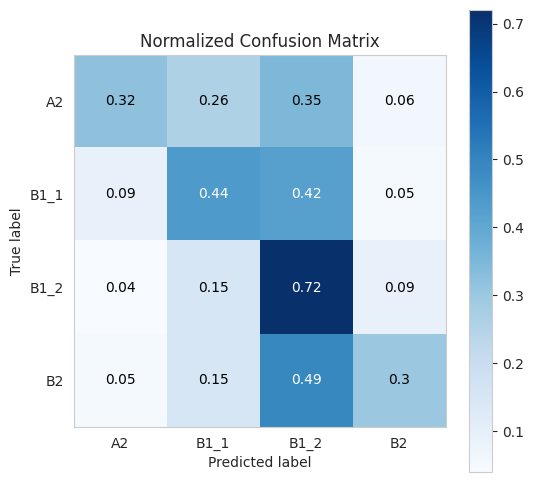

In [ ]:
skplt.metrics.plot_confusion_matrix(y_pred, le.inverse_transform(preds["NuSVC_rbf"]), normalize=True, hide_zeros=True, figsize=(6, 6));

In [ ]:
preds_str = {model:le.inverse_transform(pred) for model, pred in preds.items()}

In [ ]:
preds_df = pd.DataFrame(preds_str)
preds_df["Target"] = y_pred
preds_df.head()

,LogRegr l1 liblin,LogRegr l2 lbfgs,LogRegr l1 saga,LogRegr l2 saga,LogRegr elasticnet,Ridge 1.,Ridge .5,Ridge .1,Ridge .01,Ridge .001,Ridge .0001,Ridge .00001,SVM_lin,SVM_rbf,NuSVC_rbf,NuSVC_lin,LinearSVC,KNN3,KNN5,GaussianNB,Decision Tree,Extra Trees,Random Forest,XGBoost,LightGBM,Dummy_classifier,Target
0,B1_1,B1_1,B1_2,B1_2,B1_2,B1_1,B1_1,B1_1,B1_1,B1_1,B1_1,B1_1,B1_2,B1_2,B1_2,A2,B1_1,B1_1,B1_1,B2,B1_2,B1_2,B1_2,B1_2,B1_2,B1_2,B1_2
1,B1_2,B1_2,B1_2,B1_2,B1_2,B1_2,B1_2,B1_2,B1_2,B1_2,B1_2,B1_2,B1_2,B1_2,B1_1,B1_1,B1_1,B1_1,B1_1,B1_2,B1_1,B1_2,B1_2,B1_1,B1_2,B1_2,B1_2
2,A2,A2,A2,A2,A2,B1_1,B1_1,B1_2,B1_2,B1_2,B1_2,B1_2,A2,B1_2,B1_1,B1_1,B1_2,B1_2,B1_2,B2,B2,B1_2,B1_1,B1_2,B1_1,B1_2,B1_1
3,B1_2,B1_2,B1_2,B1_2,B1_2,B1_1,B1_1,B1_1,B1_1,B1_1,B1_1,B1_1,B1_1,B1_2,B1_2,B1_1,B1_2,B1_2,B1_2,B1_1,A2,B1_2,B1_2,B1_1,B1_1,B1_2,B1_2
4,B1_2,B1_2,B1_2,B1_2,B1_2,B1_2,B1_2,B1_2,B1_2,B1_2,B1_2,B1_2,B1_2,B1_2,B1_1,B1_1,B1_1,B1_2,B1_2,B1_1,B1_1,B1_2,B1_2,B1_2,B1_1,B1_2,B1_1


In [ ]:
def categ_corr(df):
    corr = pd.DataFrame()
    for a in list(df.columns.values):
        for b in list(df.columns.values):
            corr.loc[a, b] = (df[a]==df[b]).sum()/len(df)
    return corr

ccorr = categ_corr(preds_df)

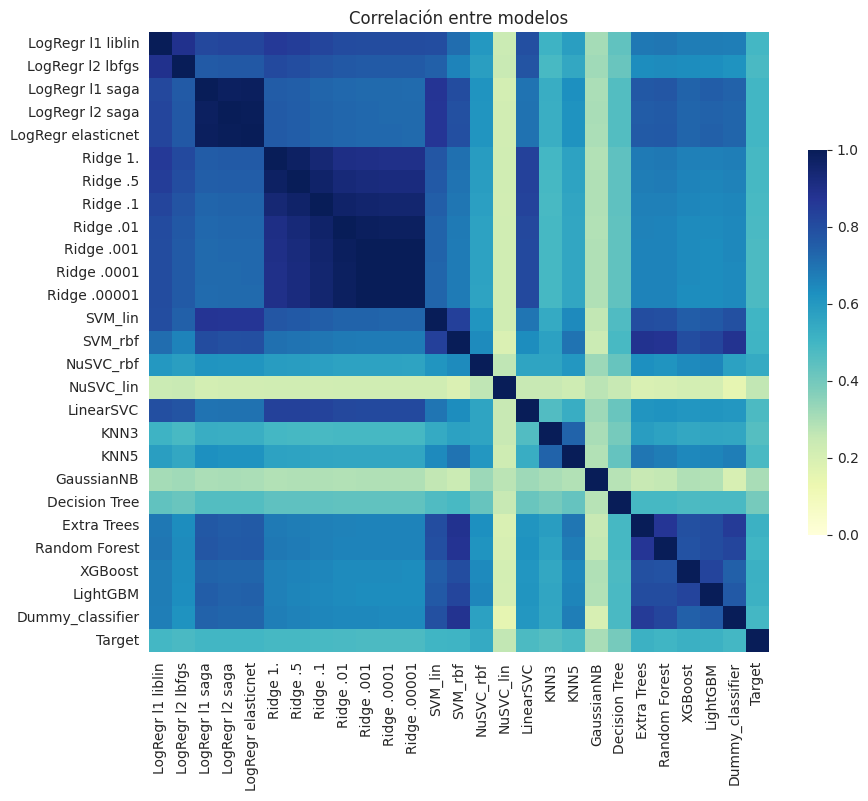

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(
    ccorr,
    #mask=np.triu(np.ones_like(ccorr, dtype=np.bool)),
    vmin=0, vmax=1,
    cmap="YlGnBu",#sb.diverging_palette(20, 220, n=200),
    square=True,
    #linewidths=.4,
    cbar_kws={"shrink": .5},
    #annot=True, fmt=".0%"
).set_title("Correlación entre modelos");

# <center> Interpretability

## Linear models: `coef_` & `intercept_`

In [ ]:
ridge = RidgeClassifier(alpha=1.)
ridge.fit(x_lex_simp_comp,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.61647e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


RidgeClassifier()

In [ ]:
labels = le.inverse_transform(ridge.classes_)

In [ ]:
coef_df = pd.DataFrame(np.transpose(ridge.coef_), index=x_lex_simp_comp.columns, columns=labels)
coef_df["General"] = coef_df.abs().sum(axis=1)
coef_df

,A2,B1_1,B1_2,B2,General
KF_Freq_AW,2.353791e-04,-1.435453e-04,2.286658e-04,-3.204996e-04,0.000928
KF_Freq_AW_Log,-8.048541e-02,2.941765e-01,2.562557e-01,-4.699467e-01,1.100864
KF_Ncats_AW,-3.018919e-01,2.105107e-02,2.516979e-01,2.914292e-02,0.603784
KF_Nsamp_AW,-3.404288e-04,1.853434e-03,-1.030433e-02,8.791325e-03,0.021290
TL_Freq_AW,-6.599286e-05,7.924567e-05,-7.061644e-05,5.736363e-05,0.000273
TL_Freq_AW_Log,4.668276e-02,-8.260882e-01,9.084081e-01,-1.290026e-01,1.910182
Brown_Freq_AW,1.145380e-04,-1.810445e-03,1.675762e-03,2.014451e-05,0.003621
Brown_Freq_AW_Log,1.091365e-01,1.571820e-01,-1.524947e-01,-1.138238e-01,0.532637
KF_Freq_CW,-1.718638e-04,8.214870e-05,-5.133630e-04,6.030781e-04,0.001370
KF_Freq_CW_Log,-9.490700e-02,6.280449e-03,7.011857e-01,-6.125591e-01,1.414932


In [ ]:
def linear_coefs_per_class(idioma, pos=10, neg=10):
    coef_idioma = coef_df[idioma].sort_values()
    # Use pd.concat to concatenate the head and tail of the sorted series
    coef_idioma = pd.concat([coef_idioma.head(neg), coef_idioma.tail(pos)])

    coef_idioma.plot(kind="barh")
    plt.title("Linear feature importance of " + idioma)
    plt.show()


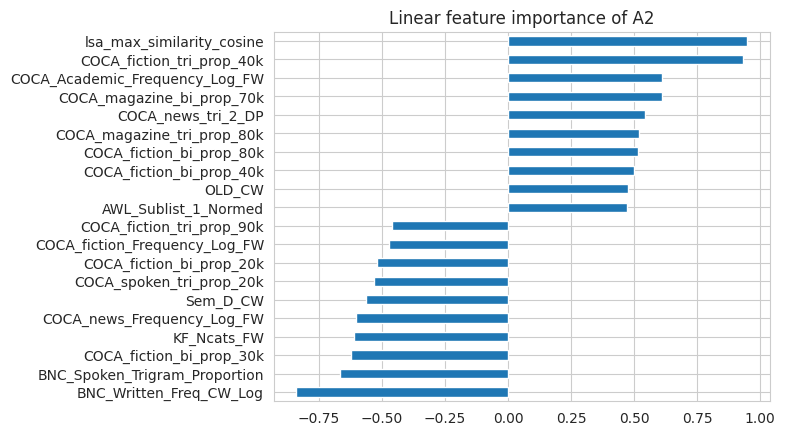

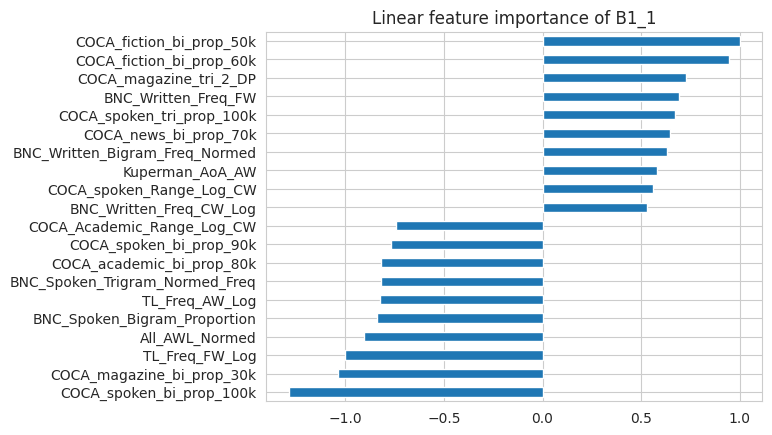

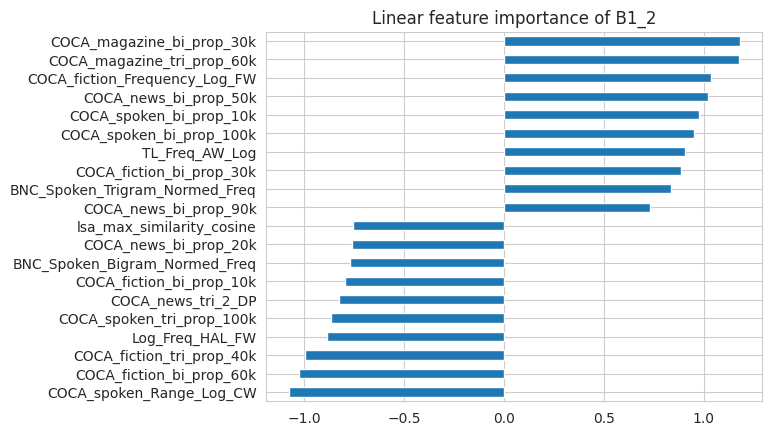

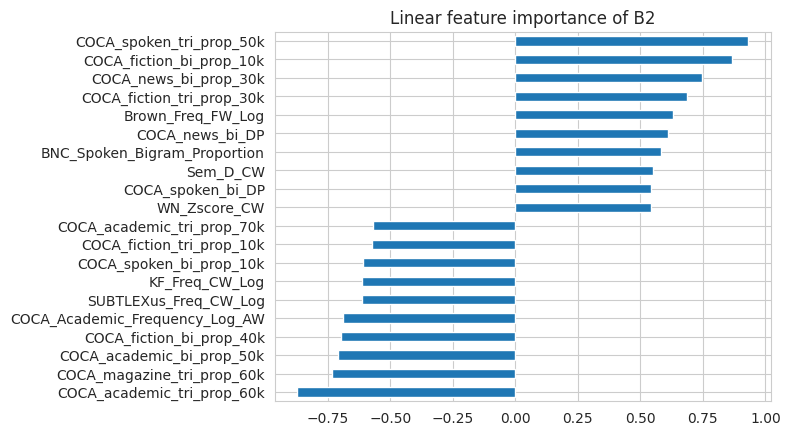

In [ ]:
for label in labels:
    linear_coefs_per_class(label, pos=10, neg=10)

In [ ]:
best_model = NuSVC(nu = 0.01)
best_model.fit(x_lex_simp_comp,y)

NuSVC(nu=0.01)

In [ ]:
# Compute Permutation Feature Importance
pfi = permutation_importance(best_model, x_lex_simp_comp, y, n_repeats=10, random_state=0, n_jobs=-1)

# Clean data
sorted_idx = pfi.importances_mean.argsort()[::-1]
pfi_df = pd.DataFrame(data=pfi.importances[sorted_idx].T, columns=x_lex_simp_comp.columns[sorted_idx])

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10, 160))
sb.barplot(data=pfi_df, orient="h").set_title("Permutation Feature Importance (Model: NuSVC_rbf)", fontsize=16);
plt.tight_layout()

In [ ]:
model = LGBMClassifier()
model.fit(x_lex_simp_comp,y)

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,x_lex_simp_comp.columns)), columns=['Value','Feature'])
plt.figure(figsize=(10, 160))
sb.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Feature Importance', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
# Compute Permutation Feature Importance
pfi = permutation_importance(model, x_lex_simp_comp, y, n_repeats=10, random_state=0, n_jobs=-1)

# Clean data
sorted_idx = pfi.importances_mean.argsort()[::-1]
pfi_df = pd.DataFrame(data=pfi.importances[sorted_idx].T, columns=x_lex_simp_comp.columns[sorted_idx])

In [ ]:
plt.figure(figsize=(10, 160))
sb.barplot(data=pfi_df, orient="h").set_title("Permutation Feature Importance",  fontsize=20);
plt.tight_layout()

# <center> DATOS SINTÁCTICOS (354 feats, 2365 rows)

In [ ]:
x_syn_simp_comp.head()

,av_nominal_deps,av_nsubj_deps,av_nsubj_pass_deps,av_agents_deps,av_dobj_deps,av_pobj_deps,av_iobj_deps,av_ncomp_deps,av_nominal_deps_NN,av_nsubj_deps_NN,av_nsubj_pass_deps_NN,av_agents_deps_NN,av_dobj_deps_NN,av_pobj_deps_NN,av_iobj_deps_NN,av_ncomp_deps_NN,nominal_deps_stdev,nsubj_stdev,nsubj_pass_stdev,agents_stdev,dobj_stdev,pobj_stdev,iobj_stdev,ncomp_stdev,nominal_deps_NN_stdev,nsubj_NN_stdev,nsubj_pass_NN_stdev,agents_NN_stdev,dobj_NN_stdev,pobj_NN_stdev,iobj_NN_stdev,ncomp_NN_stdev,det_all_nominal_deps_struct,amod_all_nominal_deps_struct,prep_all_nominal_deps_struct,poss_all_nominal_deps_struct,vmod_all_nominal_deps_struct,nn_all_nominal_deps_struct,rcmod_all_nominal_deps_struct,advmod_all_nominal_deps_struct,conj_and_all_nominal_deps_struct,conj_or_all_nominal_deps_struct,det_all_nominal_deps_NN_struct,amod_all_nominal_deps_NN_struct,prep_all_nominal_deps_NN_struct,poss_all_nominal_deps_NN_struct,vmod_all_nominal_deps_NN_struct,nn_all_nominal_deps_NN_struct,rcmod_all_nominal_deps_NN_struct,advmod_all_nominal_deps_NN_struct,conj_and_all_nominal_deps_NN_struct,conj_or_all_nominal_deps_NN_struct,det_nsubj_deps_struct,amod_nsubj_deps_struct,prep_nsubj_deps_struct,poss_nsubj_deps_struct,vmod_nsubj_deps_struct,nn_nsubj_deps_struct,rcmod_nsubj_deps_struct,advmod_nsubj_deps_struct,conj_and_nsubj_deps_struct,conj_or_nsubj_deps_struct,det_nsubj_deps_NN_struct,amod_nsubj_deps_NN_struct,prep_nsubj_deps_NN_struct,poss_nsubj_deps_NN_struct,vmod_nsubj_deps_NN_struct,nn_nsubj_deps_NN_struct,rcmod_nsubj_deps_NN_struct,advmod_nsubj_deps_NN_struct,conj_and_nsubj_deps_NN_struct,conj_or_nsubj_deps_NN_struct,det_dobj_deps_struct,amod_dobj_deps_struct,prep_dobj_deps_struct,poss_dobj_deps_struct,vmod_dobj_deps_struct,nn_dobj_deps_struct,rcmod_dobj_deps_struct,advmod_dobj_deps_struct,conj_and_dobj_deps_struct,conj_or_dobj_deps_struct,det_dobj_deps_NN_struct,amod_dobj_deps_NN_struct,prep_dobj_deps_NN_struct,poss_dobj_deps_NN_struct,vmod_dobj_deps_NN_struct,nn_dobj_deps_NN_struct,rcmod_dobj_deps_NN_struct,advmod_dobj_deps_NN_struct,conj_and_dobj_deps_NN_struct,conj_or_dobj_deps_NN_struct,det_pobj_deps_struct,amod_pobj_deps_struct,prep_pobj_deps_struct,poss_pobj_deps_struct,vmod_pobj_deps_struct,nn_pobj_deps_struct,rcmod_pobj_deps_struct,advmod_pobj_deps_struct,conj_and_pobj_deps_struct,conj_or_pobj_deps_struct,det_pobj_deps_NN_struct,amod_pobj_deps_NN_struct,prep_pobj_deps_NN_struct,poss_pobj_deps_NN_struct,vmod_pobj_deps_NN_struct,nn_pobj_deps_NN_struct,rcmod_pobj_deps_NN_struct,advmod_pobj_deps_NN_struct,conj_and_pobj_deps_NN_struct,conj_or_pobj_deps_NN_struct,det_iobj_deps_struct,amod_iobj_deps_struct,prep_iobj_deps_struct,poss_iobj_deps_struct,vmod_iobj_deps_struct,nn_iobj_deps_struct,rcmod_iobj_deps_struct,advmod_iobj_deps_struct,conj_and_iobj_deps_struct,conj_or_iobj_deps_struct,det_iobj_deps_NN_struct,amod_iobj_deps_NN_struct,prep_iobj_deps_NN_struct,poss_iobj_deps_NN_struct,vmod_iobj_deps_NN_struct,nn_iobj_deps_NN_struct,rcmod_iobj_deps_NN_struct,advmod_iobj_deps_NN_struct,conj_and_iobj_deps_NN_struct,conj_or_iobj_deps_NN_struct,cl_av_deps,cl_ndeps_std_dev,acomp_per_cl,advcl_per_cl,agent_per_cl,cc_per_cl,ccomp_per_cl,conj_per_cl,csubj_per_cl,csubjpass_per_cl,dep_per_cl,discourse_per_cl,dobj_per_cl,expl_per_cl,iobj_per_cl,mark_per_cl,ncomp_per_cl,neg_per_cl,nsubj_per_cl,nsubjpass_per_cl,parataxis_per_cl,pcomp_per_cl,prep_per_cl,prepc_per_cl,prt_per_cl,tmod_per_cl,xcomp_per_cl,xsubj_per_cl,advmod_per_cl,aux_per_cl,auxpass_per_cl,modal_per_cl,acad_av_lemma_freq,acad_av_construction_freq,acad_av_lemma_construction_freq,acad_av_approx_collexeme,acad_av_faith_verb_cue,acad_av_faith_const_cue,acad_av_delta_p_verb_cue,acad_av_delta_p_const_cue,acad_av_lemma_freq_log,acad_av_construction_freq_log,acad_av_lemma_construction_freq_log,acad_av_lemma_freq_type,acad_av_construction_freq_type,acad_av_lemma_construction_freq_type,acad_av_approx_collexeme_type,acad_av_faith_verb_cue_type,acad_av_faith_const_cue_type,acad_av_delta_p_verb_cue_type,acad_av_

In [ ]:
preds = {}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

for name, model in models.items():
    #cv_r = cross_val_score(model, x, y, cv=skf, scoring='accuracy')

    start_time = time.time()
    pred = cross_val_predict(model, x_syn_simp_comp, y, cv=skf)
    total_time = time.time() - start_time

    preds[name] = pred
    results = pd.concat([results, pd.DataFrame({"Model": [name],
                                                "Accuracy": [accuracy_score(y, pred)*100],
                                                "Bal Acc.": [balanced_accuracy_score(y, pred)*100],
                                                "Time": [total_time]})], ignore_index=True)

    results_ord = results.sort_values(by=['Bal Acc.'], ascending=False, ignore_index=True)
    results_ord.index += 1

    clear_output(wait=True)
    #display(results_ord.style.background_gradient(subset=['Accuracy', "Bal Acc.", 'Time'], cmap='Greens'))
    display(results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d'))

,Model,Accuracy,Bal Acc.,Time
1,Ridge .00001,47.421053,28.704345,0.742176
2,Ridge .0001,47.394737,28.622580,0.718054
3,Ridge .001,47.368421,28.617737,0.734469
4,Ridge .01,47.210526,28.537918,0.772883
5,LogRegr l2 lbfgs,47.131579,28.489723,9.244129
6,Ridge .1,47.605263,28.449091,0.887700
7,Ridge 1.,47.473684,28.168512,1.082974
8,LogRegr l1 liblin,47.394737,28.162891,195.250616
9,Ridge .5,47.447368,28.131748,1.100224
10,LogRegr l2 saga,47.894737,27.892135,10.023158


ValueError: The dual coefficients or intercepts are not finite. The input data may contain large values and need to bepreprocessed.

In [ ]:
y_pred = le.inverse_transform(y)
skplt.metrics.plot_confusion_matrix(y_pred, le.inverse_transform(preds["Ridge 1."]), normalize=True, hide_zeros=True, figsize=(6, 6));

In [ ]:
preds_str = {model:le.inverse_transform(pred) for model, pred in preds.items()}
preds_df = pd.DataFrame(preds_str)
preds_df["Target"] = y_pred
preds_df.head()

,LogRegr l1 liblin,LogRegr l2 lbfgs,LogRegr l1 saga,LogRegr l2 saga,LogRegr elasticnet,Ridge 1.,Ridge .5,Ridge .1,Ridge .01,Ridge .001,Ridge .0001,Ridge .00001,SVM_lin,SVM_rbf,NuSVC,LinearSVC,KNN3,KNN5,GaussianNB,Decision Tree,Extra Trees,Random Forest,XGBoost,LightGBM,Dummy_classifier,Target
0,EN,EN,EN,EN,EN,EN,EN,EN,EN,EN,EN,EN,EN,EN,EN,EN,EN,EN,GR,EN,BG,EN,BG,PL,EN,BG
1,DU,DU,GE,GE,GE,GE,GE,JP,JP,CH,CH,CH,DU,GE,DU,IT,DU,DU,GE,GE,GE,DU,DU,DU,EN,BG
2,GE,GE,GE,GE,GE,GE,GE,GE,GE,GE,GE,GE,PL,GE,EN,GE,FR,EN,GE,FR,FR,BG,BG,BG,EN,BG
3,BG,BG,BG,BG,BG,BG,BG,BG,BG,BG,BG,BG,BG,BG,BG,BG,FR,FR,GR,BG,BG,BG,BG,CH,EN,BG
4,PL,PL,PL,PL,PL,PL,PL,PL,FR,FR,FR,FR,PL,PL,PL,PL,FR,FR,GR,BG,PL,PL,PL,PL,EN,BG


In [ ]:
def categ_corr(df):
    corr = pd.DataFrame()
    for a in list(df.columns.values):
        for b in list(df.columns.values):
            corr.loc[a, b] = (df[a]==df[b]).sum()/len(df)
    return corr

ccorr = categ_corr(preds_df)

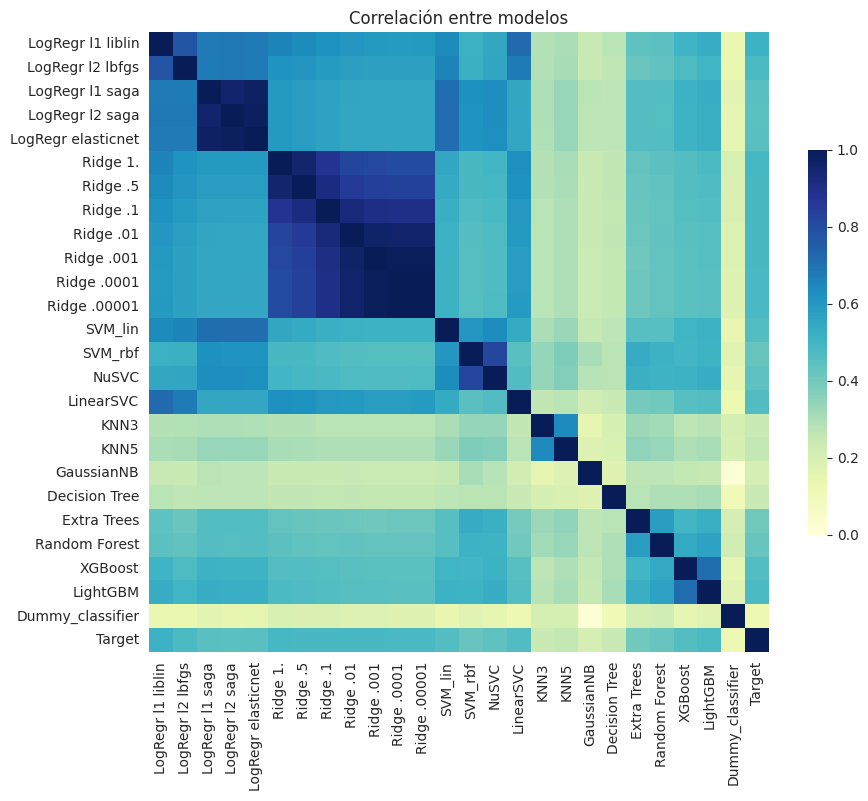

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(
    ccorr,
    #mask=np.triu(np.ones_like(ccorr, dtype=np.bool)),
    vmin=0, vmax=1,
    cmap="YlGnBu",#sb.diverging_palette(20, 220, n=200),
    square=True,
    #linewidths=.4,
    cbar_kws={"shrink": .5},
    #annot=True, fmt=".0%"
).set_title("Correlación entre modelos");

# Analisis POR PARTES de la entrevista

In [ ]:
labels = le.inverse_transform(best_model.classes_)

In [ ]:
results = pd.DataFrame()

def analisis_por_partes_entrevista(models, n_folds=20):

    for P in ["P1", "P2", "P3"]:
        x_parte = x_syn_simp_comp[parte==P] # parte es una pd.serie, P es un string
        y_parte = y[parte==P]
        skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=0)

        for modelname, model in models.items():
            pred = cross_val_predict(model, x_parte, y_parte, cv=skf)
            bal_acc = balanced_accuracy_score(y_parte, pred)*100
            results.at[P, modelname] = bal_acc

            clear_output(wait=True)
            display(results.style.bar(vmin=0, vmax=100, color='#5fba7d'))

analisis_por_partes_entrevista(models)

,LogRegr l1 liblin,LogRegr l2 lbfgs,LogRegr l1 saga,LogRegr l2 saga,LogRegr elasticnet,Ridge 1.,Ridge .5,Ridge .1,Ridge .01,Ridge .001,Ridge .0001,Ridge .00001,SVM_lin,SVM_rbf,NuSVC,LinearSVC,KNN3,KNN5,GaussianNB,Decision Tree,Extra Trees,Random Forest,XGBoost,LightGBM,Dummy_classifier
P1,47.474563,43.156592,45.298543,44.679391,44.504644,45.838176,45.484968,44.819535,41.013557,39.701431,38.804828,38.585530,43.347519,40.883791,43.039523,40.617792,25.173705,26.437030,28.803321,27.582123,40.439736,41.777227,42.847936,46.529172,8.333333
P2,51.874586,50.064976,50.490812,50.697825,50.774158,45.661236,46.274596,45.064421,43.751038,42.127829,41.928867,41.617698,47.672968,43.863038,45.964985,42.751041,24.674963,27.219863,27.099293,25.188663,43.806785,44.972250,44.839737,50.001986,8.333333
P3,45.798883,39.797776,41.767547,40.616642,41.728401,42.027858,41.492654,39.398099,37.769463,37.730318,36.687765,35.925441,40.073788,36.893497,38.880922,36.760699,26.463898,26.554776,26.471261,25.516471,35.360789,37.973416,41.170575,nan,nan


Se han truncado las últimas 5000 líneas del flujo de salida.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

# Interpretability

In [ ]:
best_model = RidgeClassifier(alpha=1.)
best_model.fit(x_syn_simp_comp,y)

In [ ]:
coef_df = pd.DataFrame(np.transpose(best_model.coef_), index=x_syn_simp_comp.columns, columns=labels)
coef_df["General"] = coef_df.abs().sum(axis=1)
coef_df

In [ ]:
def linear_coefs_per_class(idioma, pos=10, neg=10):
    coef_idioma = coef_df[idioma].sort_values()
    coef_idioma = coef_idioma.head(neg).append(coef_idioma.tail(pos))

    coef_idioma.plot(kind="barh")
    plt.title("Linear feature importance of "+idioma)
    plt.show()

for label in labels:
    linear_coefs_per_class(label, pos=10, neg=10)

In [ ]:
# Compute Permutation Feature Importance
pfi = permutation_importance(best_model, x_syn_simp_comp, y, n_repeats=10, random_state=0, n_jobs=-1)

# Clean data
sorted_idx = pfi.importances_mean.argsort()[::-1]
pfi_df = pd.DataFrame(data=pfi.importances[sorted_idx].T, columns=x_syn_simp_comp.columns[sorted_idx])

In [ ]:
plt.figure(figsize=(10, 80))
sb.barplot(data=pfi_df, orient="h").set_title("Permutation Feature Importance (Model: Ridge)", fontsize=16);
plt.tight_layout()

In [ ]:
model = LGBMClassifier()
model.fit(x_syn_simp_comp,y)

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,x_syn_simp_comp.columns)), columns=['Value','Feature'])
plt.figure(figsize=(10, 80))
sb.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Feature Importance', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
# Compute Permutation Feature Importance
pfi = permutation_importance(model, x_syn_simp_comp, y, n_repeats=10, random_state=0, n_jobs=-1)

# Clean data
sorted_idx = pfi.importances_mean.argsort()[::-1]
pfi_df = pd.DataFrame(data=pfi.importances[sorted_idx].T, columns=x_syn_simp_comp.columns[sorted_idx])

In [ ]:
plt.figure(figsize=(10, 80))
sb.barplot(data=pfi_df, orient="h").set_title("Permutation Feature Importance",  fontsize=20);
plt.tight_layout()